In [1]:
import sklearn
from sklearn import tree
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import  display

In [3]:
import numpy as np

In [4]:
from IPython.display import  HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [21]:
df_tr = pd.read_csv( 'D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\dogs_n_cats.csv', encoding='utf-8')

In [22]:
df_tr.head( )

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [23]:
df_tr.columns

Index(['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям', 'Вид'], dtype='object')

In [32]:
X = df_tr.drop(['Вид'], axis=1)

y = df_tr['Вид']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [35]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [36]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [45]:
df_ts = pd.read_json( 'D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\dataset_209691_15 (1).txt')

In [46]:
df_ts[:2]

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,27,32.4,1,1,0
1,33,39.6,1,1,0


In [47]:
df_tr[:2]

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка


In [48]:
result = clf.predict(df_ts)

In [49]:
pd.Series(result)[result == 'собачка'].count()

48

Вариант решения 2:

In [64]:
# Считать данные для обучения Дерева
dogs_n_cats = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\dogs_n_cats.csv')
X_train = dogs_n_cats.drop('Вид', axis=1)
y_train = dogs_n_cats['Вид']

In [65]:
dogs_n_cats.head( )

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [66]:
# Обучение Дерева
rs = np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [67]:
# Результат обучения
clf.score(X_train, y_train)

#>>> 1.0

1.0

In [68]:
# Считать тестовые данные
X_test = pd.read_json('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\dataset_209691_15 (1).txt')


In [69]:
# Предсказать результаты
y_pred = clf.predict(X_test)

In [71]:
# Подсчитать количество собачек
pd.Series(y_pred)[y_pred == 'собачка'].count()
#>>> 48

48

Вариант 3:

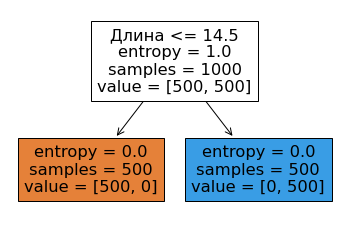

48
52


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

data_train = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\dogs_n_cats.csv')
data_test = pd.read_json('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\dataset_209691_15 (1).txt')
X_train = data_train.drop(['Вид'], axis=1)
y_train = data_train.Вид
X_test = data_test
#X_train = X_train.fillna(0)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
tree.plot_tree(clf, feature_names=list(X_train), filled=True)
plt.show()
print(list(clf.predict(X_test)).count('собачка'))
print(list(clf.predict(X_test)).count('котик'))